In [ ]:
Task name	No stopping	Ensemble state prediction	Ensemble VAE
Assistive Feeding	83 / 17 / 0	83 / 13.5 / 3.5	82.5 / 12 / 5.5
Assistive Drinking	53 / 47 / 0	53 / 39 / 8	52.5 / 38.5 / 9
Assistive Bed Bathing	11.5 / 88.5 / 0	11 / 39 / 50	10.5 / 36 / 53.5
Arm Manipulation	47.5 / 52.5 / 0	44 / 7 / 51	43.5 / 4 / 52.5
Scratch Itch	64 / 36 / 0	64 / 32 / 4	61 / 23 / 17.5


In [42]:
from dataclasses import dataclass
@dataclass
class Experiment:
    task: str
    method: str
    success: float
    failure: float
    stopped: float

    def dist(self):
        assert abs(self.success + self.failure + self.stopped - 100.0) < 0.1
        return [-self.failure, self.stopped]

In [43]:
experiments = [
    # Assistive Feeding	83 / 17 / 0 	83 / 13.5 / 3.5	    82.5 / 12 / 5.5
    Experiment(
        task="Assistive Feeding",
        method="No stopping",
        success=83, failure=17, stopped=0
    ),
    Experiment(
        task="Assistive Feeding",
        method="Ensemble state prediction",
        success=83, failure=13.5, stopped=3.5
    ),
    Experiment(
        task="Assistive Feeding",
        method="Ensemble VAE",
        success=82.5, failure=12, stopped=5.5
    ),
    
    # Assistive Drinking	53 / 47 / 0	    53 / 39 / 8 	52.5 / 38.5 / 9
    Experiment(
        task="Assistive Drinking",
        method="No stopping",
        success=53, failure=47, stopped=0
    ),
    Experiment(
        task="Assistive Drinking",
        method="Ensemble state prediction",
        success=53, failure=39, stopped=8
    ),
    Experiment(
        task="Assistive Drinking",
        method="Ensemble VAE",
        success=52.5, failure=38.5, stopped=9
    ),
    
    #Assistive Bed Bathing	11.5 / 88.5 / 0  	11 / 39 / 50	10.5 / 36 / 53.5
    Experiment(
        task="Assistive Bed Bathing",
        method="No stopping",
        success=11.5, failure=88.5, stopped=0
    ),
    Experiment(
        task="Assistive Bed Bathing",
        method="Ensemble state prediction",
        success=11, failure=39, stopped=50
    ),
    Experiment(
        task="Assistive Bed Bathing",
        method="Ensemble VAE",
        success=10.5, failure=36.5, stopped=53.5
    ),
    
    # Arm Manipulation	47.5 / 52.5 / 0	   44 / 7 / 51	  43.5 / 4 / 52.5
    Experiment(
        task="Arm Manipulation",
        method="No stopping",
        success=47.5, failure=52.5, stopped=0
    ),
    Experiment(
        task="Arm Manipulation",
        method="Ensemble state prediction",
        success=44, failure=7, stopped=51
    ),
    Experiment(
        task="Arm Manipulation",
        method="Ensemble VAE",
        success=43.5, failure=4, stopped=52.5
    ),
    
    # Scratch Itch	64 / 36 / 0	  64 / 32 / 4	 61 / 23 / 17.5
    Experiment(
        task="Scratch Itch",
        method="No stopping",
        success=64, failure=36, stopped=0
    ),
    Experiment(
        task="Scratch Itch",
        method="Ensemble state prediction",
        success=64, failure=32, stopped=4
    ),
    Experiment(
        task="Scratch Itch",
        method="Ensemble VAE",
        success=61, failure=23, stopped=17.5
    ),
]

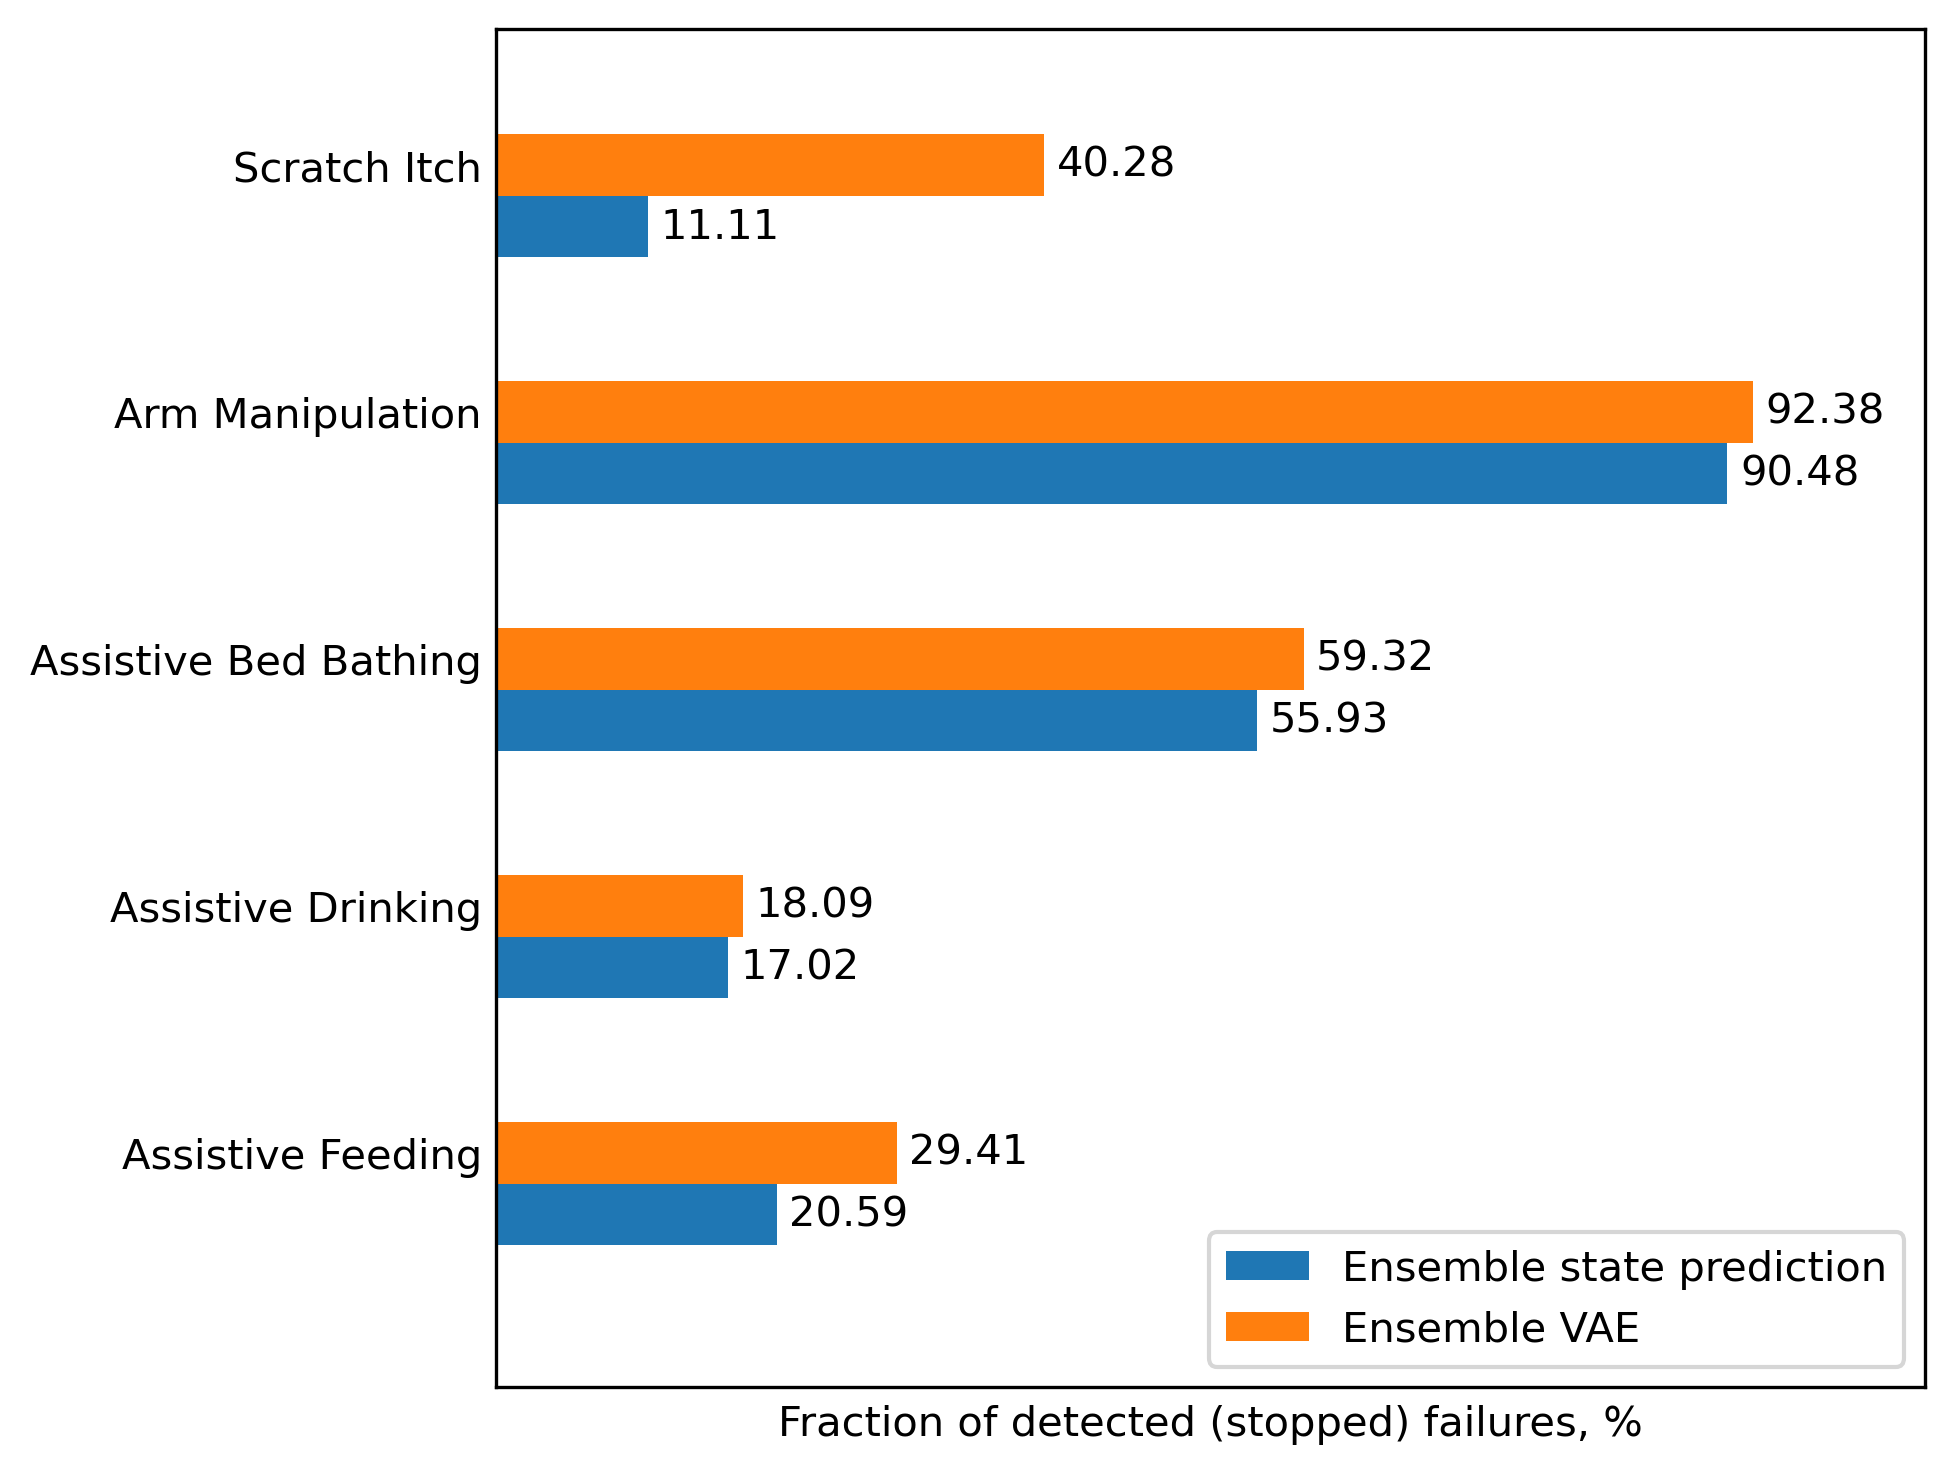

In [99]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

def plot_rates(experiments):
    species =  [exp.task for exp in experiments if "state" in exp.method]
    state_pred_stop_rate = np.array([exp.stopped for exp in experiments if "state" in exp.method])
    state_pred_succ_rate = np.array([exp.success for exp in experiments if "state" in exp.method])
    none_failure_rate = np.array([exp.failure for exp in experiments if "No" in exp.method])
    none_success_rate = np.array([exp.success for exp in experiments if "No" in exp.method])
    vae_stop_rate =  np.array([exp.stopped for exp in experiments if "VAE" in exp.method])
    vae_succ_rate =  np.array([exp.success for exp in experiments if "VAE" in exp.method])
    
    
    state_pred_rate = (state_pred_stop_rate - (none_success_rate - state_pred_succ_rate)) / none_failure_rate
    vae_rate = (vae_stop_rate - (none_success_rate - vae_succ_rate)) / none_failure_rate
    penguin_means = {
        'Ensemble state prediction': np.round(state_pred_rate * 100, decimals=2),
        'Ensemble VAE': np.round(vae_rate * 100, decimals=2),
        # 'No stopping': np.round(vae_rate * 0, decimals=2),
        # 'Flipper Length': (189.95, 195.82, 217.19),
    }
    
    x = np.arange(len(species))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0
    
    fig, ax = plt.subplots(layout='constrained', dpi=300)
    
    for attribute, measurement in penguin_means.items():
        offset = width * multiplier
        rects = ax.barh(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    # ax.set_ylabel('Length (mm)', )
    ax.set_title('')
    ax.set_yticks(x + width, species)
    ax.set_xticks([])
    ax.set_xlabel("Fraction of detected (stopped) failures, %")
    ax.yaxis.set_label_position("right")
    
    ax.legend(loc='lower right', ncols=1)
    ax.set_ylim(-0.7, len(species) - 0.2)
    ax.set_xlim(0.0, 105)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    
    
    plt.show()

plot_rates(experiments)

In [102]:
experiments = [
    # Assistive Feeding	83 / 17 / 0 	83 / 13.5 / 3.5	    82.5 / 12 / 5.5
    Experiment(
        task="Feeding (250 dem.)",
        method="No stopping",
        success=83, failure=17, stopped=0
    ),
    Experiment(
        task="Feeding (250 dem.)",
        method="Ensemble state prediction",
        success=83, failure=13.5, stopped=3.5
    ),
    Experiment(
        task="Feeding (250 dem.)",
        method="Ensemble VAE",
        success=82.5, failure=12, stopped=5.5
    ),
    
    # Feeding (100 dem.)	68 / 32 / 0	   66.5 / 19.5 / 14 	67 / 16.5 / 16.5
    Experiment(
        task="Feeding (100 dem.)",
        method="No stopping",
        success=68, failure=32, stopped=0
    ),
    Experiment(
        task="Feeding (100 dem.)",
        method="Ensemble state prediction",
        success=66.5, failure=19.5, stopped=14
    ),
    Experiment(
        task="Feeding (100 dem.)",
        method="Ensemble VAE",
        success=67, failure=16.5, stopped=16.5
    ),

    # Feeding (50 dem.)	 54 / 46 / 0	   54 / 26.5 / 19.5 	53.5 / 28.5 / 18
    Experiment(
        task="Feeding (50 dem.)",
        method="No stopping",
        success=54, failure=46, stopped=0
    ),
    Experiment(
        task="Feeding (50 dem.)",
        method="Ensemble state prediction",
        success=54, failure=26.5, stopped=19.5
    ),
    Experiment(
        task="Feeding (50 dem.)",
        method="Ensemble VAE",
        success=53.5, failure=28.5, stopped=18
    ),
]

In [106]:
vae_stop_rate

array([ 5.5, 16.5, 18. ])

Text(0.5, 1.0, 'Detected failures (Assistive Feeding task)')

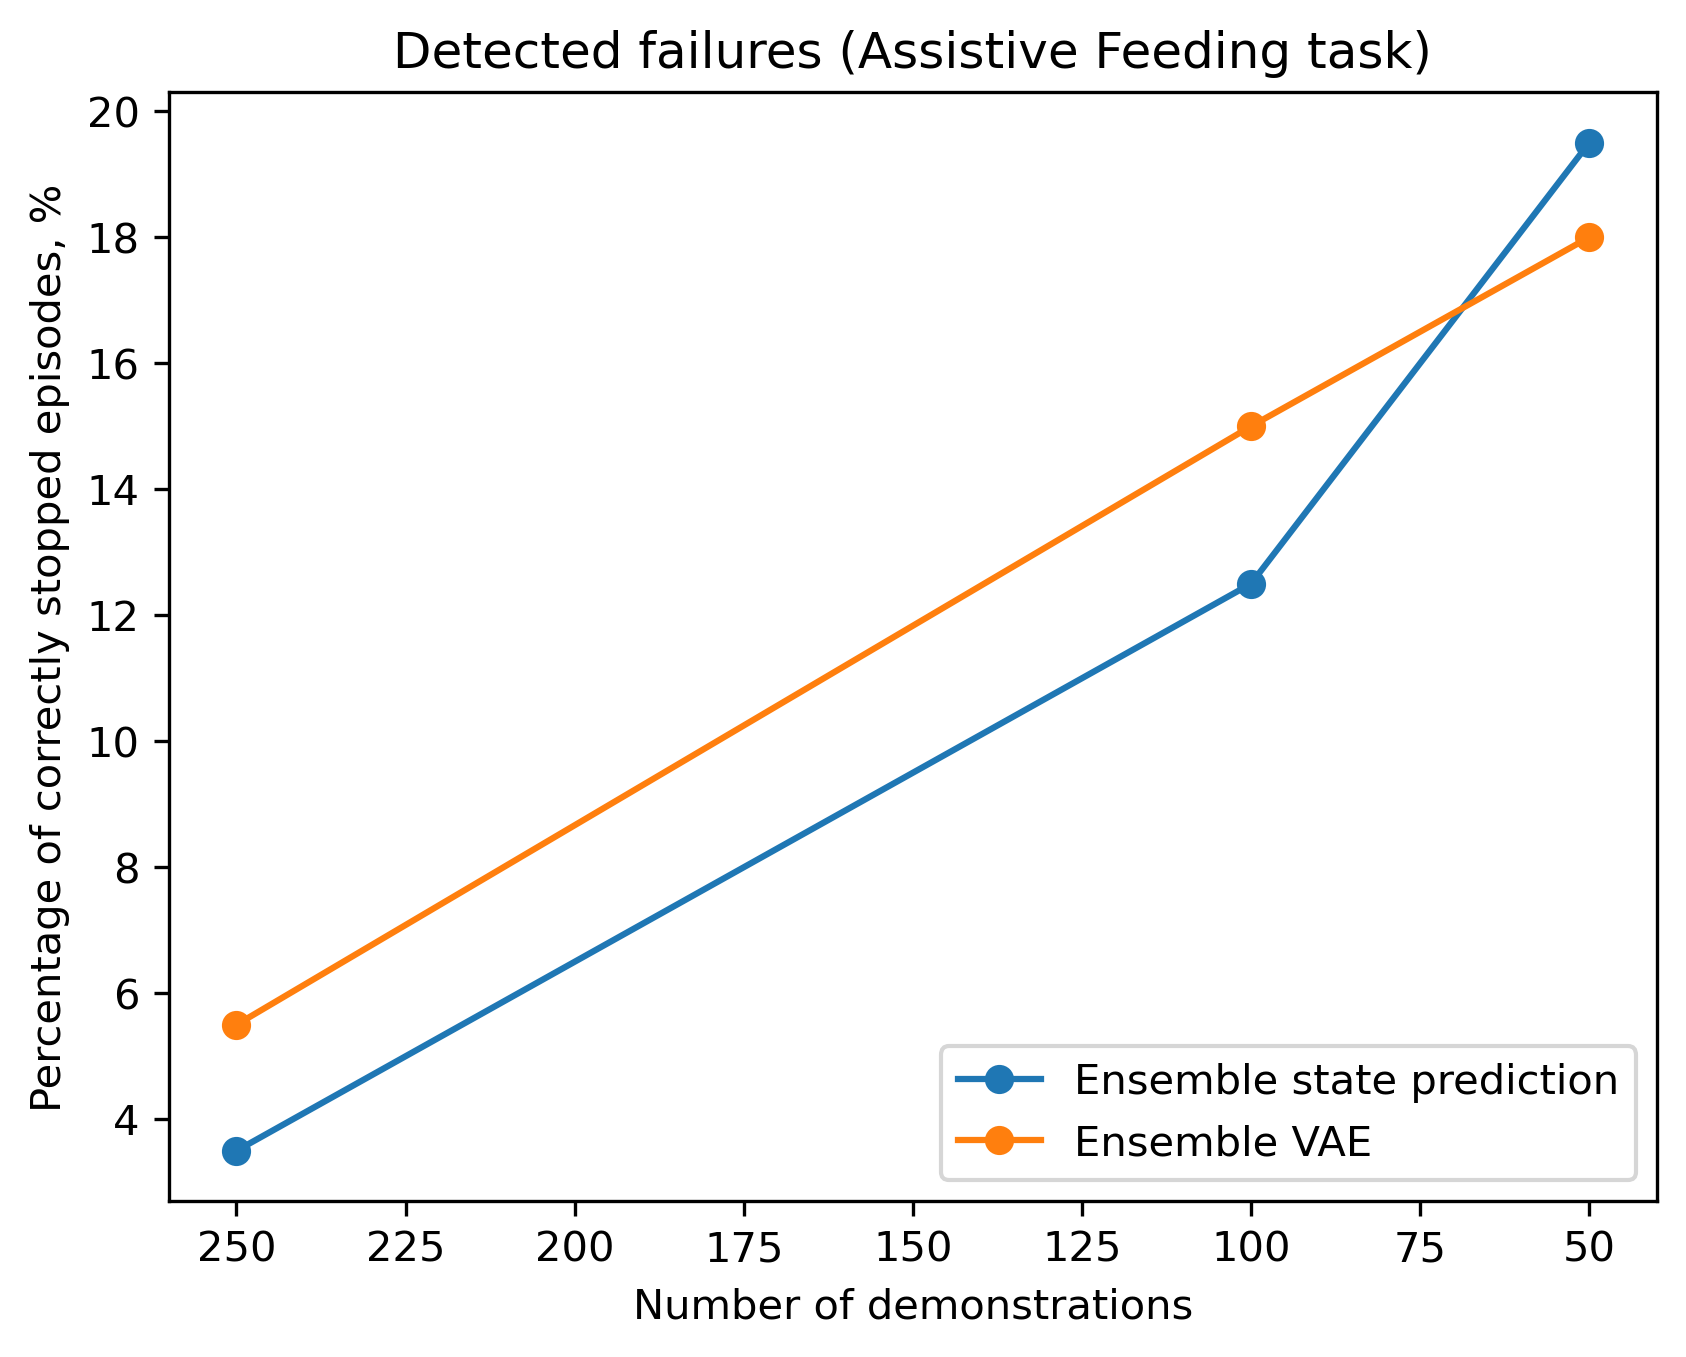

In [123]:
species =  [exp.task for exp in experiments if "state" in exp.method]
state_pred_stop_rate = np.array([exp.stopped for exp in experiments if "state" in exp.method])
state_pred_succ_rate = np.array([exp.success for exp in experiments if "state" in exp.method])
none_failure_rate = np.array([exp.failure for exp in experiments if "No" in exp.method])
none_success_rate = np.array([exp.success for exp in experiments if "No" in exp.method])
vae_stop_rate =  np.array([exp.stopped for exp in experiments if "VAE" in exp.method])
vae_succ_rate =  np.array([exp.success for exp in experiments if "VAE" in exp.method])


state_pred_rate = (state_pred_stop_rate - (none_success_rate - state_pred_succ_rate)) / none_failure_rate
vae_rate = (vae_stop_rate - (none_success_rate - vae_succ_rate)) / none_failure_rate

plt.figure(dpi=300)
plt.plot([250, 100, 50], (state_pred_stop_rate - (none_success_rate - state_pred_succ_rate)), label="Ensemble state prediction", marker="o")
plt.plot([250, 100, 50], vae_stop_rate - (none_success_rate - state_pred_succ_rate), label="Ensemble VAE", marker="o")
plt.gca().invert_xaxis()
plt.legend(loc="lower right")
plt.xlabel("Number of demonstrations")
plt.ylabel("Percentage of correctly stopped episodes, %")
plt.title("Detected failures (Assistive Feeding task)")
